In [1]:
##########################################################################
# Created on Sat Nov 16 23:14:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

### Defination

$$\mathit{Rho}=\frac{\partial \mathit{\Pi}}{\partial r}\tag{12-23}$$
where,\
$\mathit{Rho}$:Option rho\
$\mathit{\Pi}$:Option price\
$r$:Risk free rate

# 12.5.1.Rho of European option

### 1.Mathimatical expression

For European call option,
$$\mathit{Rho}=KTe^{-rT}N(d_2)\geq 0\tag{12-24}$$
where,\
$d_2=\frac{ln(S_0/K)+(r-\sigma ^2/2)T}{\sigma \sqrt{T}}$

For European put option,
$$\mathit{Rho}=-KTe^{-rT}N(-d_2)\leq 0\tag{12-25}$$

### 2.Implementation

In [3]:
def rho_EurOpt(S,K,sigma,r,T,optype):
    '''Define a function to calculate rho of European option.
    S:underlying price
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    optype:type of option. 'call' indicates call option otherwise put option'''
    from scipy.stats import norm
    from numpy import exp,log,sqrt
    
    d2=(log(S/K)+(r-pow(sigma,2)/2)*T)/(sigma*sqrt(T))
    
    if optype=='call':
        rho=K*T*exp(-r*T)*norm.cdf(d2)
    else:
        rho=-K*T*exp(-r*T)*norm.cdf(-d2)
    return rho

In [5]:
S_ABC=3.27
K_ABC=3.6
sigma_ABC=0.19
shibor_6M=0.02377
T_ABC=0.5

rho_EurCall=rho_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call')
rho_EurPut=rho_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put')

print('Rho of European call option of ABC is',round(rho_EurCall,4))
print('Rho of European put option of ABC is',round(rho_EurPut,4))

Rho of European call option of ABC is 0.4335
Rho of European put option of ABC is -1.3452


In [6]:
r_chg=0.001
call_chg=rho_EurCall*r_chg
put_chg=rho_EurPut*r_chg

print('Change of call option price when risk free rate increases 10bps is ',round(call_chg,4))
print('Change of put option price when risk free rate increases 10bps is ',round(put_chg,4))

Change of call option price when risk free rate increases 10bps is  0.0004
Change of put option price when risk free rate increases 10bps is  -0.0013


# 12.5.2.Relationship between underlying price,tenor and Rho

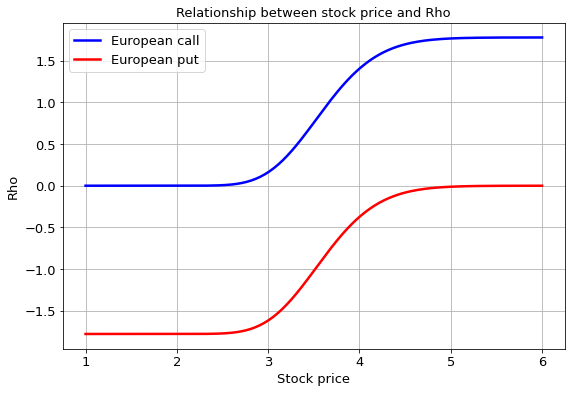

In [7]:
import matplotlib.pyplot as plt
import numpy as np

S_list2=np.linspace(1.0,6.0,200)

rho_EurCall_list=rho_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call')
rho_EurPut_list=rho_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put')

plt.figure(figsize=(9,6))
plt.plot(S_list2,rho_EurCall_list,'b-',label='European call',lw=2.5)
plt.plot(S_list2,rho_EurPut_list,'r-',label='European put',lw=2.5)
plt.xlabel('Stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Rho',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between stock price and Rho',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

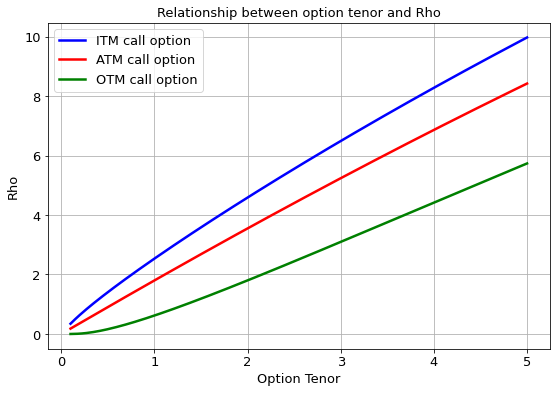

In [8]:
S1=4.0 #In the money call
S2=3.6 #At the money call
S3=3.0 #Out the money call

T_list=np.linspace(0.1,5.0,200)

rho_list1=rho_EurOpt(S=S1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')
rho_list2=rho_EurOpt(S=S2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')
rho_list3=rho_EurOpt(S=S3,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')

plt.figure(figsize=(9,6))
plt.plot(T_list,rho_list1,'b-',label='ITM call option',lw=2.5)
plt.plot(T_list,rho_list2,'r-',label='ATM call option',lw=2.5)
plt.plot(T_list,rho_list3,'g-',label='OTM call option',lw=2.5)
plt.xlabel('Option Tenor',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Rho',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between option tenor and Rho',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 12.5.3.Rho of American option

### Defination

$$\mathit{Rho}=\frac{\tilde{\mathit{\Pi}}-\mathit{\Pi}}{\Delta r}\tag{12-26}$$

In [12]:
def rho_AmerCall(S,K,sigma,r,T,N):
    '''Define a function to calculate American call option Rho using N steps binomial tree.
    S:underlying price at t0
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    N:number of step in the BTM model'''

    import utils
    
    Value1=utils.American_call(S,K,sigma,r,T,N)
    Value2=utils.American_call(S,K,sigma,r+0.0001,T,N)
    rho=(Value2-Value1)/0.0001
    
    return rho

In [13]:
def rho_AmerPut(S,K,sigma,r,T,N):
    '''Define a function to calculate American put option Rho using N steps binomial tree.
    S:underlying price at t0
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    N:number of step in the BTM model'''

    import utils
    
    Value1=utils.American_put(S,K,sigma,r,T,N)
    Value2=utils.American_put(S,K,sigma,r+0.0001,T,N)
    rho=(Value2-Value1)/0.0001
    
    return rho

In [14]:
step=100

rho_AmerOpt1=rho_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)
rho_AmerOpt2=rho_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)

print('Rho of American call option of ABC is ',round(rho_AmerOpt1,4))
print('Rho of American put option of ABC is ',round(rho_AmerOpt2,4))

Rho of American call option of ABC is  0.4333
Rho of American put option of ABC is  -0.7809
